## Red Wine Quality Prediction

## Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

# Imports Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings('ignore')

# Classification Task

### Read Data CSV

In [2]:
df = pd.read_csv(r'E:/Datatrained/Practice Project/Red Wine Quality Project/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploratory Data Analysis (EDA)

#### Show dimension data, info data & data types

In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the variables showes floats except quality which is an integer.

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### How many data in quality column

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Quality of wine are given in range of 3 - 8

#### Show describe data & correlation data

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


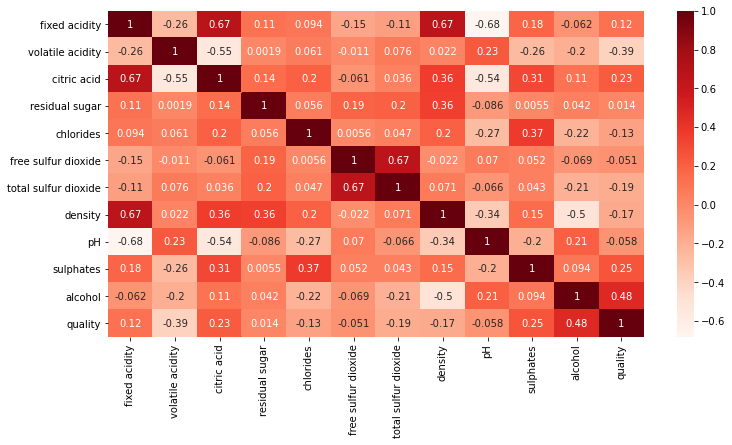

In [9]:
# plot correlation data
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.show()

Correlation between quality and Alcaohal shows better correlation and Voltile acidity shows -ve correlations. Observed least correlations woth quality for free sulfur dioxide, pH and residual sugar.

#### Check missing value, duplicate data, & outliers data

In [10]:
# check missing value
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dataset doesn't have missing value

In [11]:
# check duplicate data
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


Values of quality may have duplicate data which is dependent variable in the dataset, So we will not remove it.

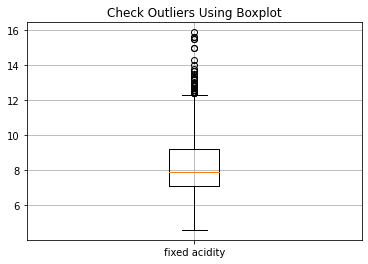

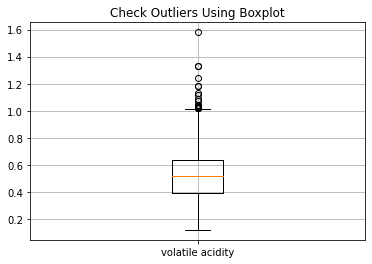

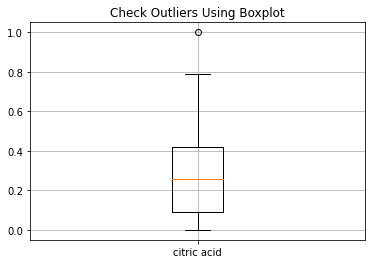

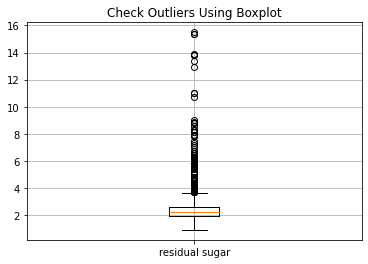

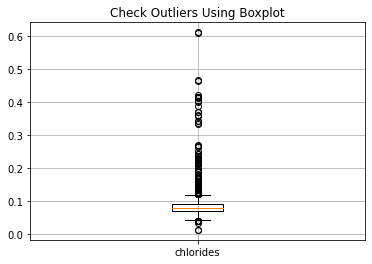

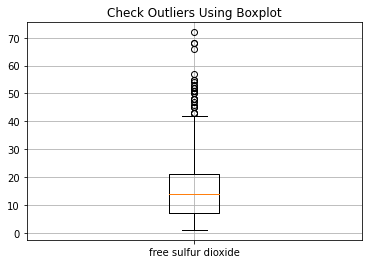

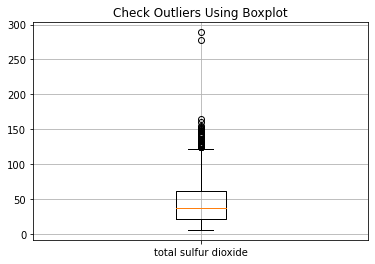

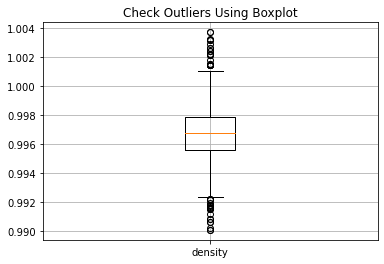

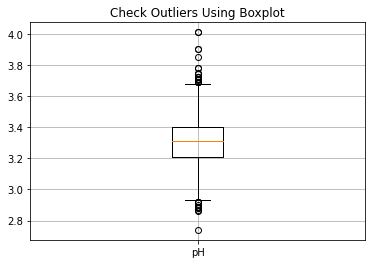

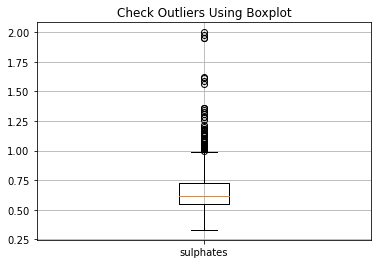

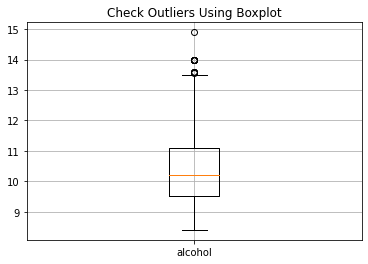

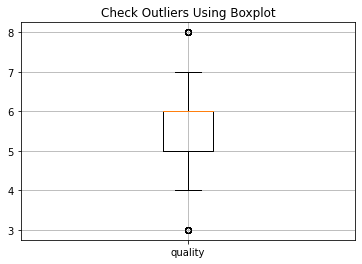

In [12]:
# using boxplot
for box in df.columns:
    plt.boxplot(df[box], labels=[box])
    plt.title('Check Outliers Using Boxplot')
    plt.grid()
    plt.show()

Observed outliers in many independent features

In [13]:
# # check outliers data
# # using IQR & boxplot or scatterplot

# import numpy as np

# for x in df.columns:
#     Q3,Q1 = np.percentile(df.loc[:,x],[75,25])
#     IQR = Q3 - Q1
 
#     max = Q3 + (1.5 * IQR)
#     min = Q1 - (1.5 * IQR)
 
#     df.loc[df[x] < min,x] = np.nan
#     df.loc[df[x] > max,x] = np.nan

# # Q1 = df.quantile(0.25)
# # Q3 = df.quantile(0.75)
# # IQR = Q3 - Q1
# # # IQR
# # low = Q1 - 1.5 * IQR
# # high = Q3 + 1.5 * IQR
# # # df2 = df[(df > low) & (df < high)]
# # df2 = df[~((df < low) | (df > high)).any(axis=1)]

In [14]:
print(df.isnull().sum())
print(f' Data NaN: {df.isnull().sum().sum()}')

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
 Data NaN: 0


In [15]:
# df.dropna(axis=0, inplace=True)

In [16]:
# Change data types column quality to int

df['quality'] = df['quality'].astype('int64')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Analys & Visualizations

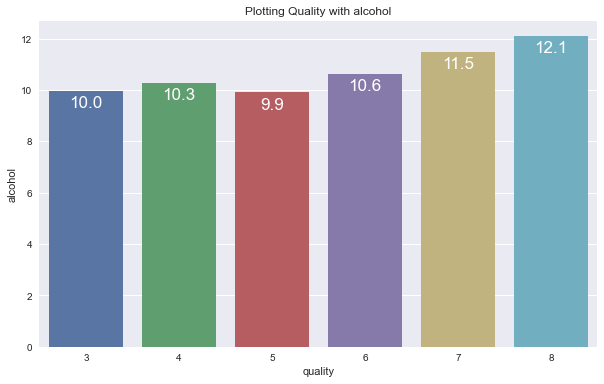

In [17]:
# Make function to plotting with anything input user about dataset df

def plotting(col_y):
    plt.style.use('seaborn')
    plt.subplots(figsize=(10,6))
    bar = sns.barplot(x='quality', y=col_y, data=df, ci=False)
    for i in bar.patches:
        bar.annotate(format(i.get_height(), '.1f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha='center', va='center', color='white', size=17, xytext=(0,-12),
                     textcoords='offset points')
    plt.title(f'Plotting Quality with {col_y}')
    plt.show()

plotting('alcohol')

Quality wine has a high alcohol level so it has high quality is quality 7 & 8

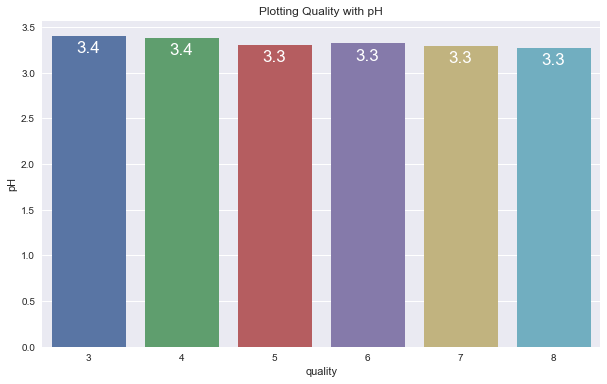

In [18]:
plotting('pH')

pH values show higher for quality 3 & 4

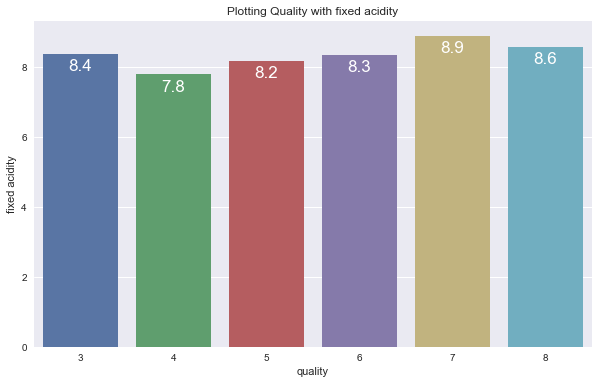

In [19]:
plotting('fixed acidity')

Fixed Acidity shows higher for quality 7.

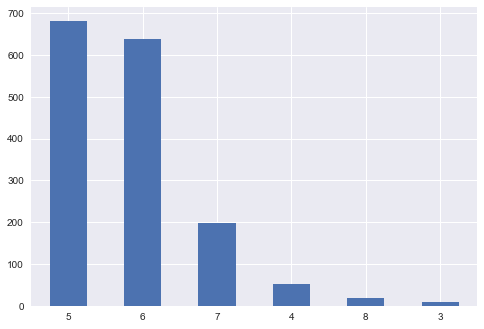

In [20]:
df.quality.value_counts().plot(kind='bar', rot=0);

The output variable likely have imbalanced data which will be handelled

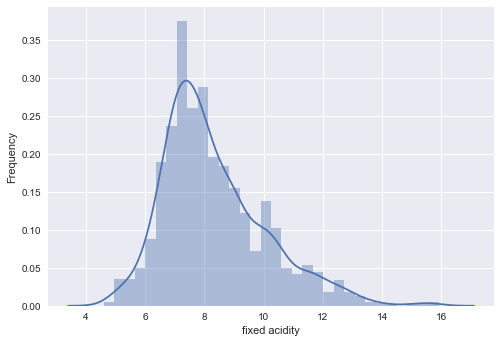

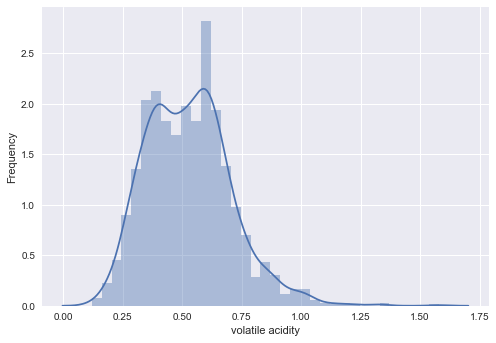

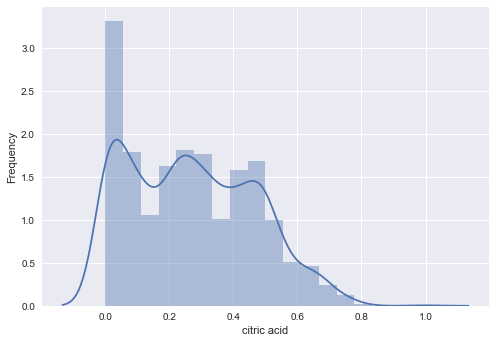

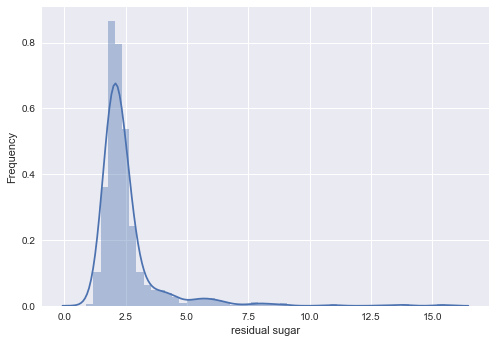

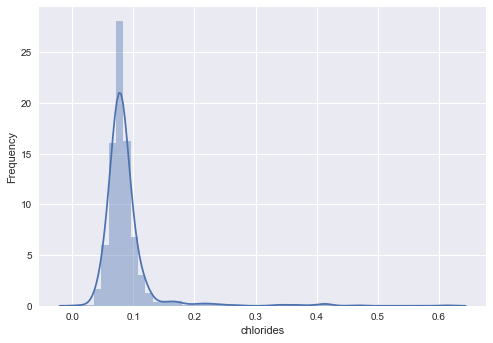

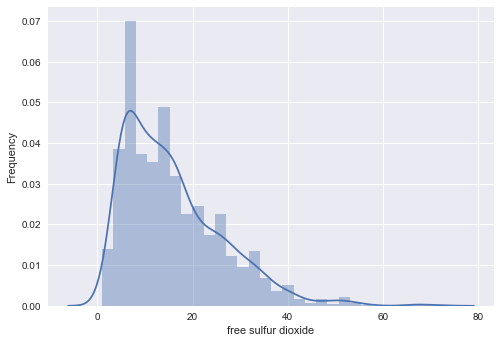

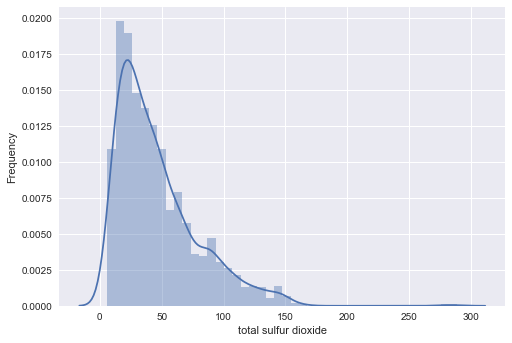

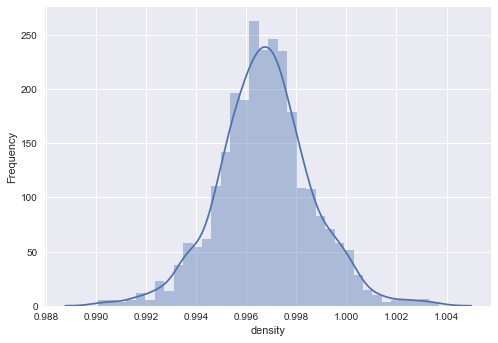

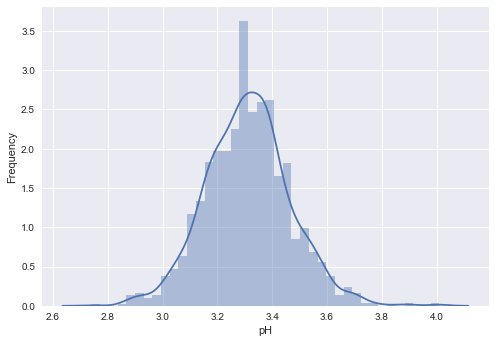

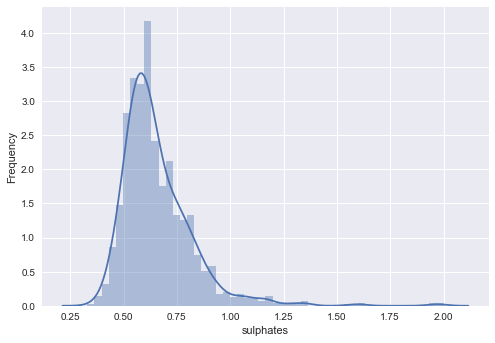

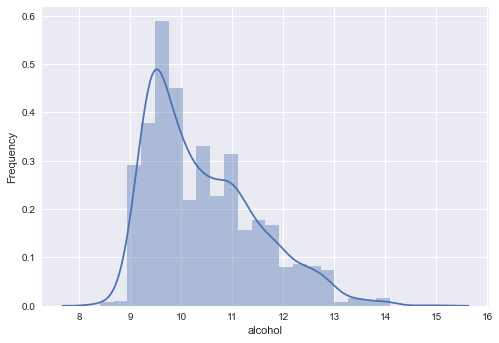

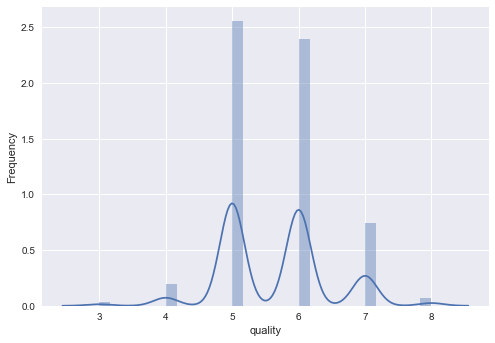

In [21]:
# Plotting data to see distribution for each column
def histPlot(col):
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for cols in df.columns:
    histPlot(cols)

Few features does not show normally distribution i.e residual sugar, chlorides, free sulfer dioxide, total sulfer dioxide, alcohal, citric acid

### Scaling

In [22]:
# split training and testing data for scaler

from sklearn.preprocessing import MinMaxScaler

data = df.copy()

scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(data), columns=[df.columns])
df_scale = scaled.drop('quality', axis=1)
df_scale



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


### Feature Selection & Split Training Testing Data

In [23]:
# split data training & testing for feature selection
X_fs = df_scale
y_fs = df['quality']

# feature selection
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X_fs, y_fs)
scores = pd.DataFrame(fit.scores_)
col = pd.DataFrame(X_fs.columns)
feature_score = pd.concat([col,scores], axis=1)
feature_score.columns = ['Feature','Score']
print(feature_score.nlargest(10, 'Score'))

                    Feature      Score
10               (alcohol,)  36.803074
1       (volatile acidity,)  13.811468
2            (citric acid,)  13.025665
6   (total sulfur dioxide,)  11.180614
9              (sulphates,)   5.474665
7                (density,)   2.525748
5    (free sulfur dioxide,)   2.434120
0          (fixed acidity,)   2.228891
4              (chlorides,)   1.455875
8                     (pH,)   0.706011


Features Alcohal, Volatile acidity, Citric acid, Total sulfur dioxide & Sulphates are contributing mostly with target variable. These are the features have been considered for training model.

In [24]:
X_fs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [25]:
y_fs

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

# Checking skewness

In [26]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Removing skewness in the dataset

In [27]:
# importing power transform
from sklearn.preprocessing import power_transform
df = power_transform(X_fs)
df = pd.DataFrame(df,columns=X_fs.columns)

In [28]:
df.skew()

fixed acidity           0.012001
volatile acidity        0.004117
citric acid             0.017788
residual sugar          0.201007
chlorides              -0.189673
free sulfur dioxide     0.126823
total sulfur dioxide    0.174068
density                 0.025968
pH                      0.008541
sulphates               0.015969
alcohol                 0.101800
dtype: float64

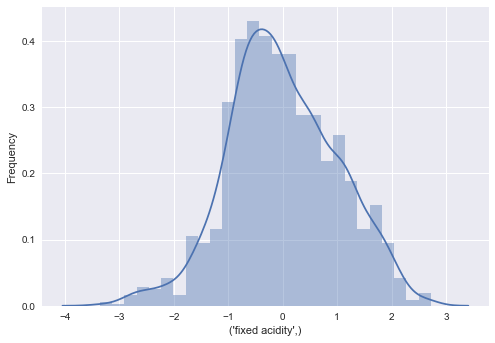

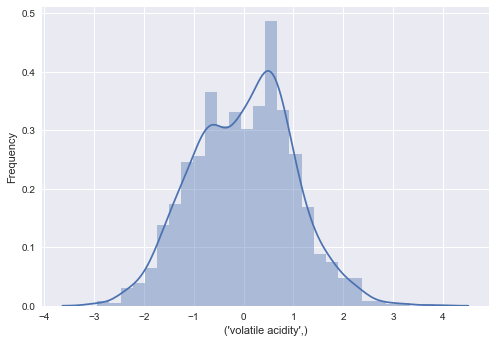

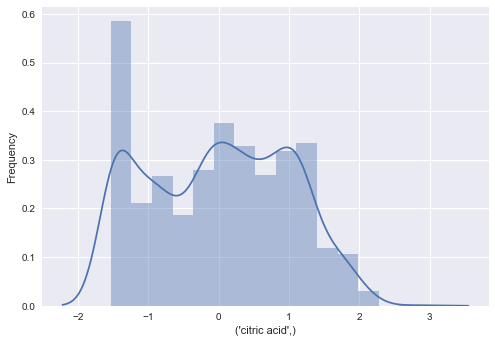

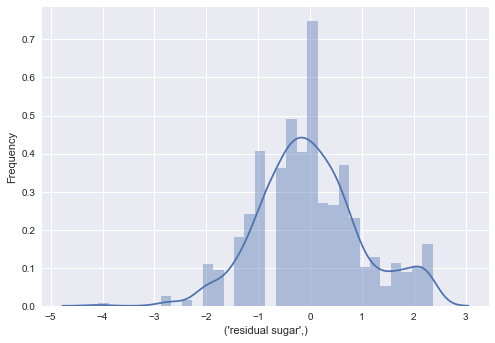

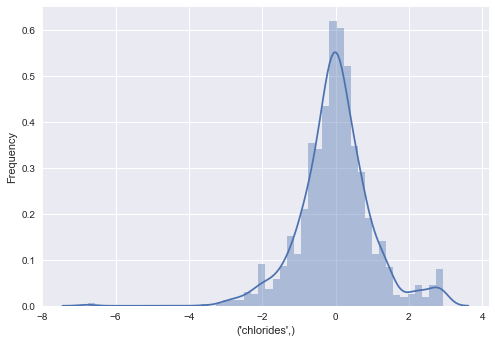

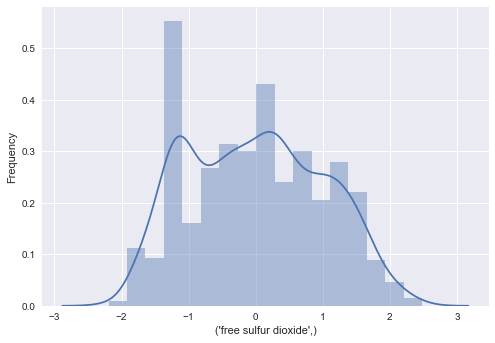

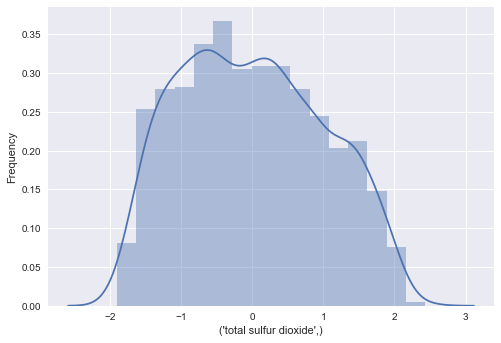

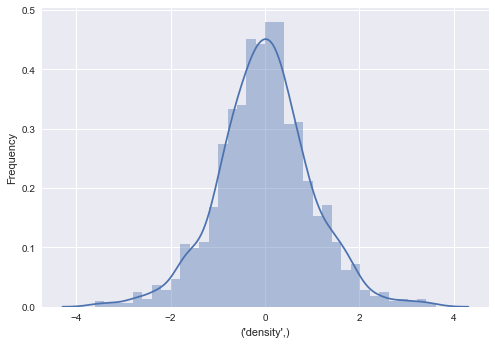

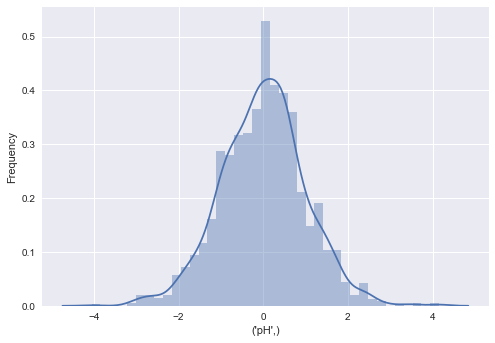

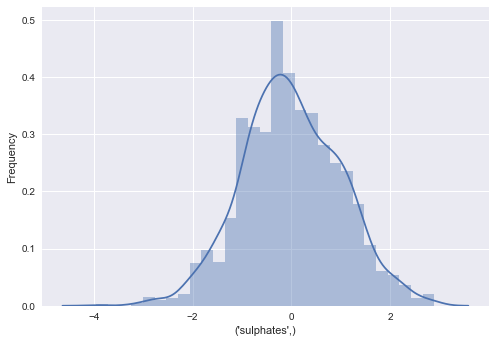

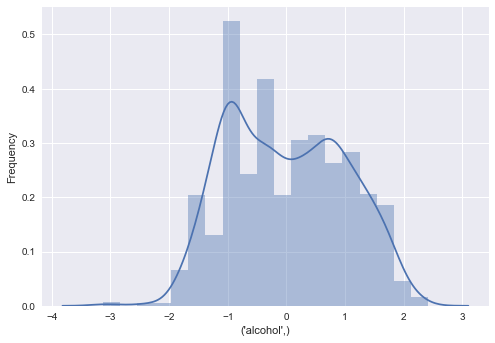

In [29]:
# Plotting data again to see distribution for each column after skewness removal
def histPlot(col):
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for cols in df.columns:
    histPlot(cols)

Datasets are skewed now

0    1382
1     217
Name: quality, dtype: int64


AxesSubplot(0.252969,0.125;0.519062x0.755)


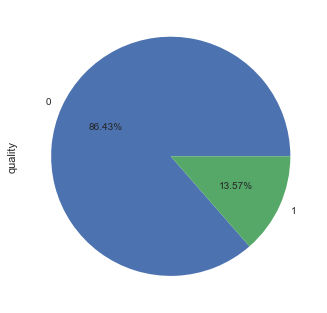

In [30]:
# change target to 0 & 1

y = y_fs.apply(lambda val: 1 if val >= 7 else 0)
print(y.value_counts())
print('\n')
print(y.value_counts().plot.pie(autopct='%0.2f%%'))

In [31]:
# splitting data training & testing data
X = df_scale[['alcohol','sulphates','total sulfur dioxide','citric acid','volatile acidity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 5) (320, 5) (1279,) (320,)


### Random Oversampling

Because dataset have imbalanced data

In [32]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

0    1382
1    1382
Name: quality, dtype: int64


AxesSubplot(0.252969,0.125;0.519062x0.755)


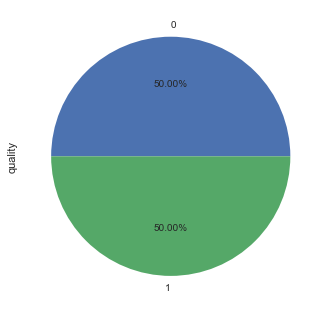

In [33]:
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train, y_train = ros.fit_resample(X, y)
print(y_train.value_counts())
print('\n')
print(y_train.value_counts().plot.pie(autopct='%0.2f%%'))

### Model Building

1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier
4. DecisionTreeClassifier
5. SVC
6. GaussianNB

#### Make custom function for model building

In [34]:
def model_building(model):
    models = model
    models.fit(X_train, y_train)
    y_pred = models.predict(X_test)
    print(f'Accuracy Score DecisonTreeClassifer: {accuracy_score(y_test, y_pred)}', '\n')
    print(f'Classification Report DecisonTreeClassifer: \n{classification_report(y_test, y_pred)}', '\n')
    print(f'Confusion Matrix DecisonTreeClassifer: \n{confusion_matrix(y_test, y_pred)}', '\n')
    print(f'Cross Val Score {cross_val_score(models, X, y, cv=5).mean()}')
    print('\n')
    prob_estimates = model.predict_proba(X_test)
    
    fpr, tpr, threshold = roc_curve(y_test, prob_estimates[:, 1])
    nilai_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'AUC: {nilai_auc}')
    plt.plot([0,1], [0,1], 'r--', label='Random Classifier')
    plt.title('ROC: Receiver Operating Charateristic')
    plt.ylabel('Recall or True Positive Rate')
    plt.xlabel('Fallout or False Positive Rate')
    plt.legend()
    plt.show() 

#### 1. LogisticRegression

Accuracy Score DecisonTreeClassifer: 0.725 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.98      0.71      0.82       290
           1       0.23      0.83      0.36        30

    accuracy                           0.73       320
   macro avg       0.60      0.77      0.59       320
weighted avg       0.91      0.72      0.78       320
 

Confusion Matrix DecisonTreeClassifer: 
[[207  83]
 [  5  25]] 

Cross Val Score 0.8674177115987461




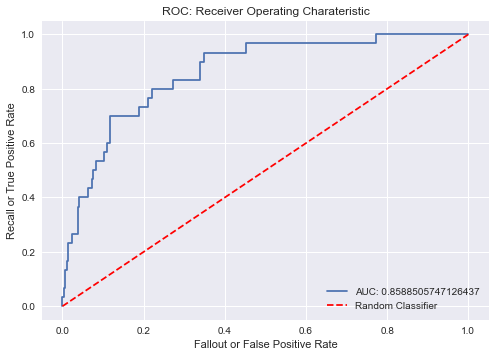

In [35]:
model_building(LogisticRegression())

#### 2. RandomForestClassifier

Accuracy Score DecisonTreeClassifer: 1.0 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00        30

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320
 

Confusion Matrix DecisonTreeClassifer: 
[[290   0]
 [  0  30]] 

Cross Val Score 0.8680387931034483




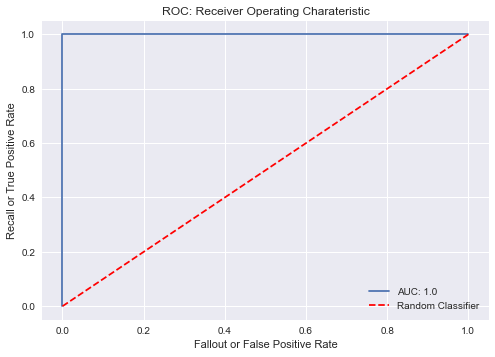

In [36]:
model_building(RandomForestClassifier(n_estimators=100))

#### 3. KNeighborsClassifier

Accuracy Score DecisonTreeClassifer: 0.8625 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       290
           1       0.41      1.00      0.58        30

    accuracy                           0.86       320
   macro avg       0.70      0.92      0.75       320
weighted avg       0.94      0.86      0.89       320
 

Confusion Matrix DecisonTreeClassifer: 
[[246  44]
 [  0  30]] 

Cross Val Score 0.8586618338557994




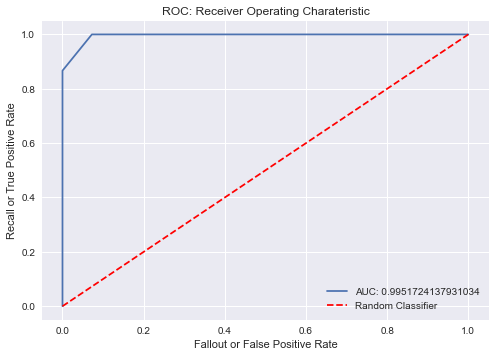

In [37]:
model_building(KNeighborsClassifier(n_neighbors=5))

#### 4. DecisionTreeClassifier

Accuracy Score DecisonTreeClassifer: 1.0 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00        30

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320
 

Confusion Matrix DecisonTreeClassifer: 
[[290   0]
 [  0  30]] 

Cross Val Score 0.8173844043887147




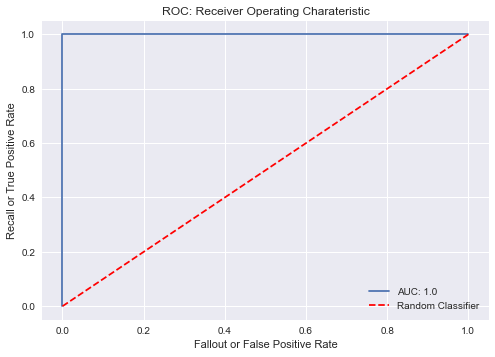

In [38]:
model_building(DecisionTreeClassifier())

#### 5. SVC

Accuracy Score DecisonTreeClassifer: 0.71875 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       290
           1       0.23      0.87      0.37        30

    accuracy                           0.72       320
   macro avg       0.61      0.79      0.59       320
weighted avg       0.91      0.72      0.78       320
 

Confusion Matrix DecisonTreeClassifer: 
[[204  86]
 [  4  26]] 

Cross Val Score 0.8768005485893416




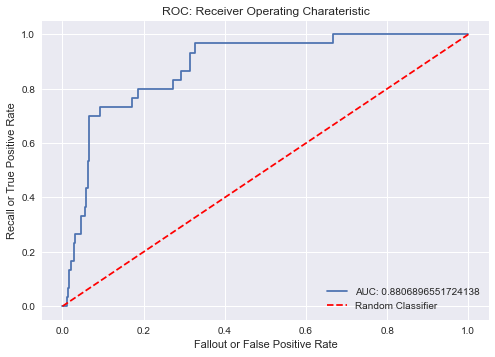

In [39]:
model_building(SVC(probability=True))

#### 6. GaussianNB

Accuracy Score DecisonTreeClassifer: 0.709375 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       290
           1       0.23      0.87      0.36        30

    accuracy                           0.71       320
   macro avg       0.60      0.78      0.59       320
weighted avg       0.91      0.71      0.77       320
 

Confusion Matrix DecisonTreeClassifer: 
[[201  89]
 [  4  26]] 

Cross Val Score 0.8555446708463951




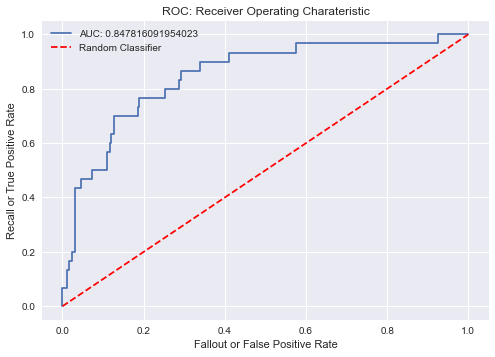

In [40]:
model_building(GaussianNB())

### Make plotting to see the best performance of the model

In [41]:
# get the accuracy score & cross val score first

mod_name = [LogisticRegression(), RandomForestClassifier(n_estimators=100), KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), 
            SVC(), GaussianNB()]
acc_mod = []
cv_mod = []

for mod in mod_name:
    models = mod
    models.fit(X_train, y_train)
    y_pred = models.predict(X_test)
    acc_mod.append(accuracy_score(y_test, y_pred))
    cv_mod.append(cross_val_score(models, X, y, cv=5).mean())

print(f'Accuracy Model: {acc_mod}', '\n')
print(f'Cross Val Score Model: {cv_mod}', '\n')

Accuracy Model: [0.725, 1.0, 0.8625, 1.0, 0.71875, 0.709375] 

Cross Val Score Model: [0.8674177115987461, 0.8692966300940439, 0.8586618338557994, 0.8104858934169279, 0.8768005485893416, 0.8555446708463951] 



DecisionTreeClassifier showing highest accuracy in Cross Validation

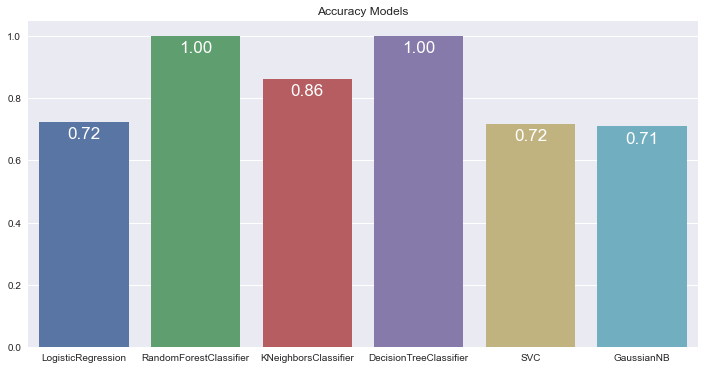

In [42]:
# plotting performance model
models_names = ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 
                'SVC', 'GaussianNB']


plt.style.use('seaborn')
plt.subplots(figsize=(12,6))
bar = sns.barplot(x=models_names, y=acc_mod, ci=False)
for i in bar.patches:
    bar.annotate(format(i.get_height(), '.2f'),
                 (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', color='white', size=17, xytext=(0,-12),
                 textcoords='offset points')
plt.title(f'Accuracy Models')
plt.show()

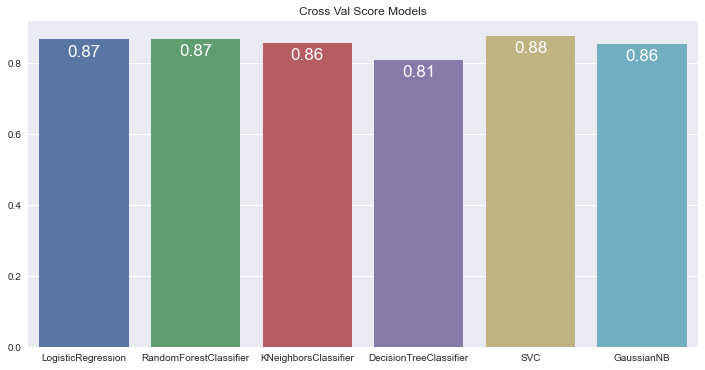

In [43]:
plt.style.use('seaborn')
plt.subplots(figsize=(12,6))
bar = sns.barplot(x=models_names, y=cv_mod, ci=False)
for i in bar.patches:
    bar.annotate(format(i.get_height(), '.2f'),
                 (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', color='white', size=17, xytext=(0,-12),
                 textcoords='offset points')
plt.title(f'Cross Val Score Models')
plt.show()

### Get best parameters for model using RandomizedSearchCV

In [44]:
model_params = {
    "RandomForestClassifier" : {
        "model" : RandomForestClassifier(),
        "params" : {
            "n_estimators" : [60,80,100],
            "bootstrap" : [True],
            "max_depth" : [60,80,100,120],
            "min_samples_leaf" : [2,3,5,7],
            "min_samples_split" : [10,12,14],
            "max_features" : [2,3,4,5]
        }
    },
    
    "KNeighborsClassifier" : {
        "model" : KNeighborsClassifier(),
        "params" : {
            "n_neighbors" : [2,3,4,5,6],
            "leaf_size" : [50,60,70,80],
            "n_jobs" : [-1,1]
        }
    },
    
    "DecisionTreeClassifier" : {
        "model" : DecisionTreeClassifier(),
        "params" : {
            "criterion" : ['gini','entropy'],
            "max_depth" : [60,70,80,90],
            "min_samples_leaf" : [7,8,9],
            "min_samples_split" : [10,11,12]
        }
    },
    
    "LogisticRegression" : {
        "model" : LogisticRegression(solver='liblinear', multi_class='auto'),
        "params" : {
            "C" : [1,5,10]
        }
    },
    
    "SVC" : {
        "model" : SVC(),
        "params" : {
            "C" : [1.0, 1.5, 2.0],
            "kernel" : ['linear', 'rbf'],
            "gamma" : ['scale', 'auto']
        }
    },
    
    "GaussianNB" : {
        "model" : GaussianNB(),
        "params" : {
            "priors" : [None],
            "var_smoothing" : [1e-09]
        }
    }
}

In [45]:
# scores = []

for model_name, model_par in model_params.items():
    res = RandomizedSearchCV(model_par['model'], model_par['params'], cv=5, n_iter=3, return_train_score=False)
    res.fit(X_train, y_train)
    print(f'Model {model_name}, Best Scores: {res.best_score_}')
#     scores.append({
#         'model' : model_name,
#         'best_score' : res.best_score_
#     })

Model RandomForestClassifier, Best Scores: 0.9290877165395601
Model KNeighborsClassifier, Best Scores: 0.933788688838221
Model DecisionTreeClassifier, Best Scores: 0.8820563723563174
Model LogisticRegression, Best Scores: 0.773515344497733
Model SVC, Best Scores: 0.7970359304976806
Model GaussianNB, Best Scores: 0.7699059150352492


In [46]:
for model_name, model_par in model_params.items():
    res = RandomizedSearchCV(model_par['model'], model_par['params'], cv=5, n_iter=3, return_train_score=False)
    res.fit(X_train, y_train)
    print(f'Model {model_name}, Best Params: {res.best_params_}\n')

Model RandomForestClassifier, Best Params: {'n_estimators': 60, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': 60, 'bootstrap': True}

Model KNeighborsClassifier, Best Params: {'n_neighbors': 4, 'n_jobs': -1, 'leaf_size': 70}

Model DecisionTreeClassifier, Best Params: {'min_samples_split': 11, 'min_samples_leaf': 7, 'max_depth': 90, 'criterion': 'entropy'}

Model LogisticRegression, Best Params: {'C': 1}

Model SVC, Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 2.0}

Model GaussianNB, Best Params: {'var_smoothing': 1e-09, 'priors': None}



### Predict new data with `DecisionTreeClassifier`

In [47]:
# DecisionTreeClassifier
mod_tree = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=7, max_depth=90, criterion='gini')
mod_tree.fit(X_train, y_train)
y_pred_tree = mod_tree.predict(X_test)
print(f'Accuracy Score DecisonTreeClassifer: {accuracy_score(y_test, y_pred_tree)}', '\n')
print(f'Classification Report DecisonTreeClassifer: \n{classification_report(y_test, y_pred_tree)}', '\n')
print(f'Confusion Matrix DecisonTreeClassifer: \n{confusion_matrix(y_test, y_pred_tree)}', '\n')
print(f'Cross Val Score {cross_val_score(mod_tree, X, y, cv=5).mean()}')

Accuracy Score DecisonTreeClassifer: 0.93125 

Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       290
           1       0.58      0.97      0.72        30

    accuracy                           0.93       320
   macro avg       0.79      0.95      0.84       320
weighted avg       0.96      0.93      0.94       320
 

Confusion Matrix DecisonTreeClassifer: 
[[269  21]
 [  1  29]] 

Cross Val Score 0.8448942006269593


We use model DecisonTreeClassifer because have roc curve 1 and RandomForestClassifier might be can be use to 

In [48]:
# predict new data DecisonTreeClassifer
y_pred_tree = mod_tree.predict(X_test+120)
print(f'Confusion Matrix DecisonTreeClassifer: \n{confusion_matrix(y_test, y_pred_tree)}', '\n')

Confusion Matrix DecisonTreeClassifer: 
[[  0 290]
 [  0  30]] 



In [49]:
X_test

,alcohol,sulphates,total sulfur dioxide,citric acid,volatile acidity
1109,0.369231,0.257485,0.212014,0.43,0.239726
1032,0.184615,0.119760,0.028269,0.00,0.479452
1002,0.507692,0.305389,0.074205,0.33,0.116438
487,0.246154,0.053892,0.028269,0.36,0.359589
979,0.307692,0.179641,0.000000,0.49,0.226027
...,...,...,...,...,...
794,0.630769,0.119760,0.070671,0.54,0.102740
813,0.461538,0.149701,0.003534,0.24,0.184932
1322,0.461538,0.131737,0.042403,0.42,0.150685
704,0.200000,0.125749,0.028269,0.04,0.441781


# Save the model and later you can use it for prediction

In [50]:
#Saving the model to the local file system
import pickle
filename = 'Red_Wine_Quality.pickle'
pickle.dump(model_building, open(filename, 'wb'))

So, with model DecisionTreeClassifier we can use to predict quality of red wine quality. If you want to use another model, its possible because all model have a good performance. But, I want to use DecisionTreeClassifier to predict red wine quality.